# Solve a McCall model

Last update: Oct 13th, 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [73]:
# Preparations and parameterization
n, a, b = 51, 200, 100                        # default parameters
q_default = stats.betabinom(n, a, b).pmf      # probability mass function

In [74]:
w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n)
q_grid = q_default(w_default)

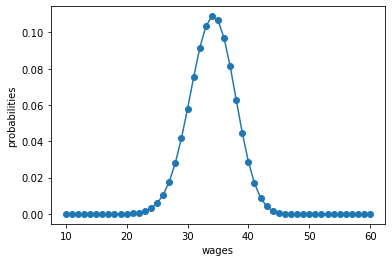

In [75]:
fig, ax = plt.subplots()
ax.plot(w_default, q_grid, '-o')
ax.set_xlabel('wages')
ax.set_ylabel('probabilities')

plt.show()

In [76]:
c = 25       # Unemployment benefit
beta = 0.99  # Discount factor

## 1. Solve by taking the limit of finite-period solution

In [86]:
T = 2000
v = np.zeros((T, n))
w = np.zeros(n)

# initialization
is_accept = (w_default > c)
v[0, :] = w_default * (is_accept == True) + c * (is_accept == False)
w = w_default

for i in range(T - 1):
    # If choose to accept, what value it would be?
    w = w_default + beta * w
    # Continuation value?
    cont = c + beta * np.dot(v[i, :], q_grid)
    # Accept/reject given state?
    is_accept = (w > cont)
    v[i + 1, :] = w * (is_accept == True) + cont * (is_accept == False)

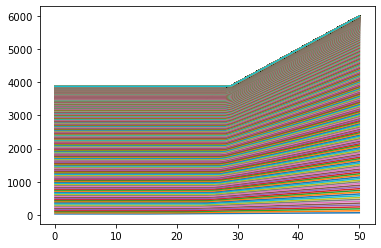

In [87]:
plt.plot(v.T) # TODO: edit!
plt.show()

## 2. Solve by fixed point iteration

In [88]:
T = 10
v = np.zeros((T, n))
w = w_default / (1 - beta)

# initialization
is_accept = (w > c)
v[0, :] = w * (is_accept == True) + c * (is_accept == False)

for i in range(T - 1):
    # Continuation value?
    cont = c + beta * np.dot(v[i, :], q_grid)
    # Accept/reject given state?
    is_accept = (w > cont)
    v[i + 1, :] = w * (is_accept == True) + cont * (is_accept == False)

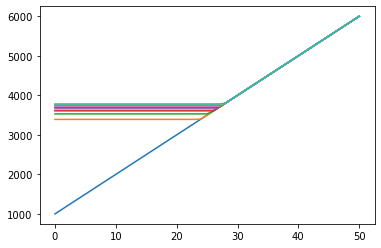

In [89]:
plt.plot(v.T) # TODO: edit!
plt.show()